In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls data

 Volume in drive D is DATA
 Volume Serial Number is FAA9-24C8

 Directory of D:\FaceRecognition\data

19-05-2021  14:59    <DIR>          .
19-05-2021  14:59    <DIR>          ..
19-05-2021  14:59    <DIR>          men
19-05-2021  14:59    <DIR>          women
               0 File(s)              0 bytes
               4 Dir(s)  291,103,457,280 bytes free


In [6]:
from glob import glob


In [8]:
female_path=glob('./data/women/*.jpg')

In [9]:
female_path

['./data/women\\00000000.jpg',
 './data/women\\00000001.jpg',
 './data/women\\00000002.jpg',
 './data/women\\00000003.jpg',
 './data/women\\00000007.jpg',
 './data/women\\00000008.jpg',
 './data/women\\00000009.jpg',
 './data/women\\00000010.jpg',
 './data/women\\00000013.jpg',
 './data/women\\00000015.jpg',
 './data/women\\00000016.jpg',
 './data/women\\00000017.jpg',
 './data/women\\00000018.jpg',
 './data/women\\00000019.jpg',
 './data/women\\00000020.jpg',
 './data/women\\00000021.jpg',
 './data/women\\00000022.jpg',
 './data/women\\00000023.jpg',
 './data/women\\00000025.jpg',
 './data/women\\00000026.jpg',
 './data/women\\00000027.jpg',
 './data/women\\00000029.jpg',
 './data/women\\00000030.jpg',
 './data/women\\00000033.jpg',
 './data/women\\00000034.jpg',
 './data/women\\00000036.jpg',
 './data/women\\00000039.jpg',
 './data/women\\00000040.jpg',
 './data/women\\00000041.jpg',
 './data/women\\00000042.jpg',
 './data/women\\00000043.jpg',
 './data/women\\00000044.jpg',
 './data

In [10]:
male_path=glob('./data/men/*.jpg')

In [11]:
male_path

['./data/men\\00000001.jpg',
 './data/men\\00000002.jpg',
 './data/men\\00000003.jpg',
 './data/men\\00000004.jpg',
 './data/men\\00000005.jpg',
 './data/men\\00000006.jpg',
 './data/men\\00000007.jpg',
 './data/men\\00000008.jpg',
 './data/men\\00000009.jpg',
 './data/men\\00000010.jpg',
 './data/men\\00000011.jpg',
 './data/men\\00000012.jpg',
 './data/men\\00000013.jpg',
 './data/men\\00000014.jpg',
 './data/men\\00000015.jpg',
 './data/men\\00000016.jpg',
 './data/men\\00000017.jpg',
 './data/men\\00000018.jpg',
 './data/men\\00000019.jpg',
 './data/men\\00000020.jpg',
 './data/men\\00000021.jpg',
 './data/men\\00000022.jpg',
 './data/men\\00000023.jpg',
 './data/men\\00000024.jpg',
 './data/men\\00000025.jpg',
 './data/men\\00000026.jpg',
 './data/men\\00000028.jpg',
 './data/men\\00000029.jpg',
 './data/men\\00000030.jpg',
 './data/men\\00000031.jpg',
 './data/men\\00000032.jpg',
 './data/men\\00000034.jpg',
 './data/men\\00000035.jpg',
 './data/men\\00000036.jpg',
 './data/men\\

In [12]:
len(female_path)

1725

In [13]:
len(male_path)

1301

In [21]:
#lets see one image
path=female_path[40]
img=cv2.imread(path)

In [22]:
img.shape

(210, 340, 3)

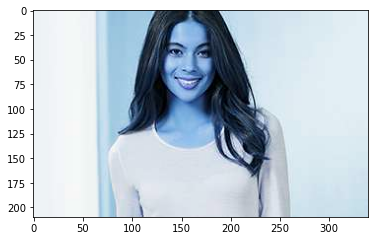

In [23]:
plt.imshow(img)
plt.show()

In [24]:
#converting the image to grayscale
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(210, 340)

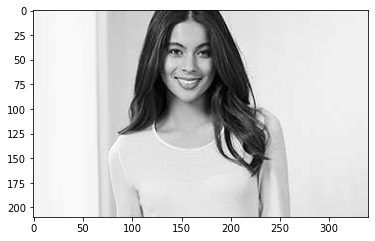

In [26]:
plt.imshow(gray,cmap='gray')

In [27]:
#Cropping the face using haarcascade
#loading the haarcascade classfier
haar=cv2.CascadeClassifier('./model/haarcascade_frontalface_default.xml')

In [28]:
faces=haar.detectMultiScale(gray,1.5,5)
print(faces)

[[116  12  81  81]]


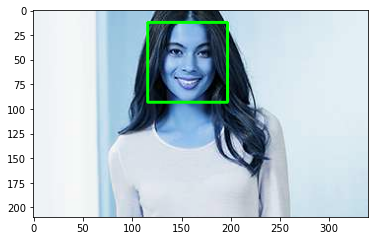

In [29]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img)

In [30]:
# cropping the image
crop_img=img[y:y+h,x:x+w]


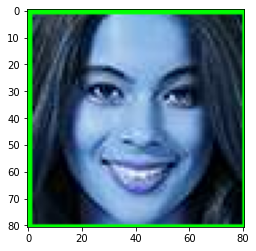

In [31]:
plt.imshow(crop_img)

In [32]:
#save the image
cv2.imwrite('f_01.png',crop_img)

True

In [35]:
# applying it to all the images
def extract_images(path,gender,i):
    img=cv2.imread(path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=haar.detectMultiScale(gray,1.5,5)
    for (x,y,w,h) in faces:
        cp=img[y:y+h,x:x+w]
        if gender=='male':
            cv2.imwrite('./data/crop/male_crop/{}_{}.png'.format(gender,i),cp)
        else:
            cv2.imwrite('./data/crop/female_crop/{}_{}.png'.format(gender,i),cp)

In [36]:
extract_images(female_path[0],'female',1)

In [37]:
for i,path in enumerate(female_path):
    try:
        extract_images(path,'female',i)
        print('INFO: {}/{} processed successfully'.format(i,len(female_path)))
    except:
        print('INFO: {}/{} cannot be processed'.format(i,len(female_path)))

INFO: 0/1725 processed successfully
INFO: 1/1725 processed successfully
INFO: 2/1725 processed successfully
INFO: 3/1725 processed successfully
INFO: 4/1725 processed successfully
INFO: 5/1725 processed successfully
INFO: 6/1725 processed successfully
INFO: 7/1725 processed successfully
INFO: 8/1725 processed successfully
INFO: 9/1725 processed successfully
INFO: 10/1725 processed successfully
INFO: 11/1725 processed successfully
INFO: 12/1725 processed successfully
INFO: 13/1725 processed successfully
INFO: 14/1725 processed successfully
INFO: 15/1725 processed successfully
INFO: 16/1725 processed successfully
INFO: 17/1725 processed successfully
INFO: 18/1725 processed successfully
INFO: 19/1725 processed successfully
INFO: 20/1725 processed successfully
INFO: 21/1725 processed successfully
INFO: 22/1725 processed successfully
INFO: 23/1725 processed successfully
INFO: 24/1725 processed successfully
INFO: 25/1725 processed successfully
INFO: 26/1725 processed successfully
INFO: 27/17

INFO: 219/1725 processed successfully
INFO: 220/1725 processed successfully
INFO: 221/1725 processed successfully
INFO: 222/1725 processed successfully
INFO: 223/1725 processed successfully
INFO: 224/1725 processed successfully
INFO: 225/1725 processed successfully
INFO: 226/1725 processed successfully
INFO: 227/1725 processed successfully
INFO: 228/1725 processed successfully
INFO: 229/1725 processed successfully
INFO: 230/1725 processed successfully
INFO: 231/1725 processed successfully
INFO: 232/1725 processed successfully
INFO: 233/1725 processed successfully
INFO: 234/1725 processed successfully
INFO: 235/1725 processed successfully
INFO: 236/1725 processed successfully
INFO: 237/1725 processed successfully
INFO: 238/1725 processed successfully
INFO: 239/1725 processed successfully
INFO: 240/1725 processed successfully
INFO: 241/1725 processed successfully
INFO: 242/1725 processed successfully
INFO: 243/1725 processed successfully
INFO: 244/1725 processed successfully
INFO: 245/17

INFO: 434/1725 processed successfully
INFO: 435/1725 processed successfully
INFO: 436/1725 processed successfully
INFO: 437/1725 processed successfully
INFO: 438/1725 processed successfully
INFO: 439/1725 processed successfully
INFO: 440/1725 processed successfully
INFO: 441/1725 processed successfully
INFO: 442/1725 processed successfully
INFO: 443/1725 processed successfully
INFO: 444/1725 processed successfully
INFO: 445/1725 processed successfully
INFO: 446/1725 processed successfully
INFO: 447/1725 processed successfully
INFO: 448/1725 processed successfully
INFO: 449/1725 processed successfully
INFO: 450/1725 processed successfully
INFO: 451/1725 processed successfully
INFO: 452/1725 processed successfully
INFO: 453/1725 processed successfully
INFO: 454/1725 processed successfully
INFO: 455/1725 processed successfully
INFO: 456/1725 processed successfully
INFO: 457/1725 processed successfully
INFO: 458/1725 processed successfully
INFO: 459/1725 processed successfully
INFO: 460/17

INFO: 652/1725 processed successfully
INFO: 653/1725 processed successfully
INFO: 654/1725 processed successfully
INFO: 655/1725 processed successfully
INFO: 656/1725 processed successfully
INFO: 657/1725 processed successfully
INFO: 658/1725 processed successfully
INFO: 659/1725 processed successfully
INFO: 660/1725 processed successfully
INFO: 661/1725 processed successfully
INFO: 662/1725 processed successfully
INFO: 663/1725 processed successfully
INFO: 664/1725 processed successfully
INFO: 665/1725 processed successfully
INFO: 666/1725 processed successfully
INFO: 667/1725 processed successfully
INFO: 668/1725 processed successfully
INFO: 669/1725 processed successfully
INFO: 670/1725 processed successfully
INFO: 671/1725 processed successfully
INFO: 672/1725 processed successfully
INFO: 673/1725 processed successfully
INFO: 674/1725 processed successfully
INFO: 675/1725 processed successfully
INFO: 676/1725 processed successfully
INFO: 677/1725 processed successfully
INFO: 678/17

INFO: 869/1725 processed successfully
INFO: 870/1725 processed successfully
INFO: 871/1725 processed successfully
INFO: 872/1725 processed successfully
INFO: 873/1725 processed successfully
INFO: 874/1725 processed successfully
INFO: 875/1725 processed successfully
INFO: 876/1725 processed successfully
INFO: 877/1725 processed successfully
INFO: 878/1725 processed successfully
INFO: 879/1725 processed successfully
INFO: 880/1725 processed successfully
INFO: 881/1725 processed successfully
INFO: 882/1725 processed successfully
INFO: 883/1725 processed successfully
INFO: 884/1725 processed successfully
INFO: 885/1725 processed successfully
INFO: 886/1725 processed successfully
INFO: 887/1725 processed successfully
INFO: 888/1725 processed successfully
INFO: 889/1725 processed successfully
INFO: 890/1725 processed successfully
INFO: 891/1725 processed successfully
INFO: 892/1725 processed successfully
INFO: 893/1725 processed successfully
INFO: 894/1725 processed successfully
INFO: 895/17

INFO: 1085/1725 processed successfully
INFO: 1086/1725 processed successfully
INFO: 1087/1725 processed successfully
INFO: 1088/1725 processed successfully
INFO: 1089/1725 processed successfully
INFO: 1090/1725 processed successfully
INFO: 1091/1725 processed successfully
INFO: 1092/1725 processed successfully
INFO: 1093/1725 processed successfully
INFO: 1094/1725 processed successfully
INFO: 1095/1725 processed successfully
INFO: 1096/1725 processed successfully
INFO: 1097/1725 processed successfully
INFO: 1098/1725 processed successfully
INFO: 1099/1725 processed successfully
INFO: 1100/1725 processed successfully
INFO: 1101/1725 processed successfully
INFO: 1102/1725 processed successfully
INFO: 1103/1725 processed successfully
INFO: 1104/1725 processed successfully
INFO: 1105/1725 processed successfully
INFO: 1106/1725 processed successfully
INFO: 1107/1725 processed successfully
INFO: 1108/1725 processed successfully
INFO: 1109/1725 processed successfully
INFO: 1110/1725 processed

INFO: 1295/1725 processed successfully
INFO: 1296/1725 processed successfully
INFO: 1297/1725 processed successfully
INFO: 1298/1725 processed successfully
INFO: 1299/1725 processed successfully
INFO: 1300/1725 processed successfully
INFO: 1301/1725 processed successfully
INFO: 1302/1725 processed successfully
INFO: 1303/1725 processed successfully
INFO: 1304/1725 processed successfully
INFO: 1305/1725 processed successfully
INFO: 1306/1725 processed successfully
INFO: 1307/1725 processed successfully
INFO: 1308/1725 processed successfully
INFO: 1309/1725 processed successfully
INFO: 1310/1725 processed successfully
INFO: 1311/1725 processed successfully
INFO: 1312/1725 processed successfully
INFO: 1313/1725 processed successfully
INFO: 1314/1725 processed successfully
INFO: 1315/1725 processed successfully
INFO: 1316/1725 processed successfully
INFO: 1317/1725 processed successfully
INFO: 1318/1725 processed successfully
INFO: 1319/1725 processed successfully
INFO: 1320/1725 processed

INFO: 1507/1725 processed successfully
INFO: 1508/1725 processed successfully
INFO: 1509/1725 processed successfully
INFO: 1510/1725 processed successfully
INFO: 1511/1725 processed successfully
INFO: 1512/1725 processed successfully
INFO: 1513/1725 processed successfully
INFO: 1514/1725 processed successfully
INFO: 1515/1725 processed successfully
INFO: 1516/1725 processed successfully
INFO: 1517/1725 processed successfully
INFO: 1518/1725 processed successfully
INFO: 1519/1725 processed successfully
INFO: 1520/1725 processed successfully
INFO: 1521/1725 processed successfully
INFO: 1522/1725 processed successfully
INFO: 1523/1725 processed successfully
INFO: 1524/1725 processed successfully
INFO: 1525/1725 processed successfully
INFO: 1526/1725 processed successfully
INFO: 1527/1725 processed successfully
INFO: 1528/1725 processed successfully
INFO: 1529/1725 processed successfully
INFO: 1530/1725 processed successfully
INFO: 1531/1725 processed successfully
INFO: 1532/1725 processed

INFO: 1718/1725 processed successfully
INFO: 1719/1725 processed successfully
INFO: 1720/1725 processed successfully
INFO: 1721/1725 processed successfully
INFO: 1722/1725 processed successfully
INFO: 1723/1725 processed successfully
INFO: 1724/1725 processed successfully


In [38]:
for i,path in enumerate(male_path):
    try:
        extract_images(path,'male',i)
        print('INFO: {}/{} processed successfully'.format(i,len(male_path)))
    except:
        print('INFO: {}/{} cannot be processed'.format(i,len(male_path)))

INFO: 0/1301 processed successfully
INFO: 1/1301 processed successfully
INFO: 2/1301 processed successfully
INFO: 3/1301 processed successfully
INFO: 4/1301 processed successfully
INFO: 5/1301 processed successfully
INFO: 6/1301 processed successfully
INFO: 7/1301 processed successfully
INFO: 8/1301 processed successfully
INFO: 9/1301 processed successfully
INFO: 10/1301 processed successfully
INFO: 11/1301 processed successfully
INFO: 12/1301 processed successfully
INFO: 13/1301 processed successfully
INFO: 14/1301 processed successfully
INFO: 15/1301 processed successfully
INFO: 16/1301 processed successfully
INFO: 17/1301 processed successfully
INFO: 18/1301 processed successfully
INFO: 19/1301 processed successfully
INFO: 20/1301 processed successfully
INFO: 21/1301 processed successfully
INFO: 22/1301 processed successfully
INFO: 23/1301 processed successfully
INFO: 24/1301 processed successfully
INFO: 25/1301 processed successfully
INFO: 26/1301 processed successfully
INFO: 27/13

INFO: 223/1301 processed successfully
INFO: 224/1301 processed successfully
INFO: 225/1301 processed successfully
INFO: 226/1301 processed successfully
INFO: 227/1301 processed successfully
INFO: 228/1301 processed successfully
INFO: 229/1301 processed successfully
INFO: 230/1301 processed successfully
INFO: 231/1301 processed successfully
INFO: 232/1301 processed successfully
INFO: 233/1301 processed successfully
INFO: 234/1301 processed successfully
INFO: 235/1301 processed successfully
INFO: 236/1301 processed successfully
INFO: 237/1301 processed successfully
INFO: 238/1301 processed successfully
INFO: 239/1301 processed successfully
INFO: 240/1301 processed successfully
INFO: 241/1301 processed successfully
INFO: 242/1301 processed successfully
INFO: 243/1301 processed successfully
INFO: 244/1301 processed successfully
INFO: 245/1301 processed successfully
INFO: 246/1301 processed successfully
INFO: 247/1301 processed successfully
INFO: 248/1301 processed successfully
INFO: 249/13

INFO: 440/1301 processed successfully
INFO: 441/1301 processed successfully
INFO: 442/1301 processed successfully
INFO: 443/1301 processed successfully
INFO: 444/1301 processed successfully
INFO: 445/1301 processed successfully
INFO: 446/1301 processed successfully
INFO: 447/1301 processed successfully
INFO: 448/1301 processed successfully
INFO: 449/1301 processed successfully
INFO: 450/1301 processed successfully
INFO: 451/1301 processed successfully
INFO: 452/1301 processed successfully
INFO: 453/1301 processed successfully
INFO: 454/1301 processed successfully
INFO: 455/1301 processed successfully
INFO: 456/1301 processed successfully
INFO: 457/1301 processed successfully
INFO: 458/1301 processed successfully
INFO: 459/1301 processed successfully
INFO: 460/1301 processed successfully
INFO: 461/1301 processed successfully
INFO: 462/1301 processed successfully
INFO: 463/1301 processed successfully
INFO: 464/1301 processed successfully
INFO: 465/1301 processed successfully
INFO: 466/13

INFO: 658/1301 processed successfully
INFO: 659/1301 processed successfully
INFO: 660/1301 processed successfully
INFO: 661/1301 processed successfully
INFO: 662/1301 processed successfully
INFO: 663/1301 processed successfully
INFO: 664/1301 processed successfully
INFO: 665/1301 processed successfully
INFO: 666/1301 processed successfully
INFO: 667/1301 processed successfully
INFO: 668/1301 processed successfully
INFO: 669/1301 processed successfully
INFO: 670/1301 processed successfully
INFO: 671/1301 processed successfully
INFO: 672/1301 processed successfully
INFO: 673/1301 processed successfully
INFO: 674/1301 processed successfully
INFO: 675/1301 processed successfully
INFO: 676/1301 processed successfully
INFO: 677/1301 processed successfully
INFO: 678/1301 processed successfully
INFO: 679/1301 processed successfully
INFO: 680/1301 processed successfully
INFO: 681/1301 processed successfully
INFO: 682/1301 processed successfully
INFO: 683/1301 processed successfully
INFO: 684/13

INFO: 877/1301 processed successfully
INFO: 878/1301 processed successfully
INFO: 879/1301 processed successfully
INFO: 880/1301 processed successfully
INFO: 881/1301 processed successfully
INFO: 882/1301 processed successfully
INFO: 883/1301 processed successfully
INFO: 884/1301 processed successfully
INFO: 885/1301 processed successfully
INFO: 886/1301 processed successfully
INFO: 887/1301 processed successfully
INFO: 888/1301 processed successfully
INFO: 889/1301 processed successfully
INFO: 890/1301 processed successfully
INFO: 891/1301 processed successfully
INFO: 892/1301 processed successfully
INFO: 893/1301 processed successfully
INFO: 894/1301 processed successfully
INFO: 895/1301 processed successfully
INFO: 896/1301 processed successfully
INFO: 897/1301 processed successfully
INFO: 898/1301 processed successfully
INFO: 899/1301 processed successfully
INFO: 900/1301 processed successfully
INFO: 901/1301 processed successfully
INFO: 902/1301 processed successfully
INFO: 903/13

INFO: 1094/1301 processed successfully
INFO: 1095/1301 processed successfully
INFO: 1096/1301 processed successfully
INFO: 1097/1301 processed successfully
INFO: 1098/1301 processed successfully
INFO: 1099/1301 processed successfully
INFO: 1100/1301 processed successfully
INFO: 1101/1301 processed successfully
INFO: 1102/1301 processed successfully
INFO: 1103/1301 processed successfully
INFO: 1104/1301 processed successfully
INFO: 1105/1301 processed successfully
INFO: 1106/1301 processed successfully
INFO: 1107/1301 processed successfully
INFO: 1108/1301 processed successfully
INFO: 1109/1301 processed successfully
INFO: 1110/1301 processed successfully
INFO: 1111/1301 processed successfully
INFO: 1112/1301 processed successfully
INFO: 1113/1301 processed successfully
INFO: 1114/1301 processed successfully
INFO: 1115/1301 processed successfully
INFO: 1116/1301 processed successfully
INFO: 1117/1301 processed successfully
INFO: 1118/1301 processed successfully
INFO: 1119/1301 processed